**DAFTAR ISI**
1.   IMPORT LIBRARY
2.   DATASET
3. SEGMENTASI

  3.1 PISAHKAN CITRA MENJADI R G DAN B

  3.2 PERBAIKI CITRA GREEN

  3.3 PERBAIKI CITRA RED

  3.4 GABUNGKAN KEMBALI CITRA

  3.5 KONVERSI RGB KE HSV

  3.6 PILIH CHANNEL H - TERAPKAN MEDIAN FILTERING

  3.7 KONVERSI KE BINER

  3.8 MORFOLOGI

  3.9 LAKUKAN PELABELAN DAN PILIH LUAS PALING MAKSIMAL



4. EKSTRAKSI FITUR - GLCM
5. KLASIFIKASI - NAIVE BAYES

  5.1 MEMBACA DATA

  5.2 NORMALISASI DATA

  5.3 MEMISAHKAN FITUR DAN TARGET

  5.4 SPLITTING DATA

  5.5 MODEL NAIVE BAYES, K-FOLD CROSS VALIDATION

  5.6 PREDIKSI

  5.7 CONFUSSION MATRIKS




# **1. IMPORT ILBRARY**

In [54]:
# Untuk komputasi numerik dan operasi array
import numpy as np
# Untuk analisis dan manipulasi data
import pandas as pd
# Untuk menampilkan data dengan lebih baik di Jupyter Notebook
from IPython.display import display
# Untuk pengolahan gambar
import cv2
# Untuk menangani file path
import glob
# Untuk mengakses file dan direktori
import os
# Untuk visualisasi data
import seaborn as sns
# Untuk visualisasi data
import matplotlib.pyplot as plt
# Untuk membaca gambar
import matplotlib.image as mpimg
# Untuk pengolahan gambar menggunakan skimage
from skimage import io, color
# Untuk ekstraksi fitur gambar dengan GLCM (Gray-Level Co-occurrence Matrix)
from skimage.feature import graycomatrix, graycoprops
# Untuk normalisasi data
from sklearn.preprocessing import MinMaxScaler
# Untuk membaagi dataset menjadi training dan testing
from sklearn.model_selection import KFold, train_test_split
# Algoritma Naive Bayes
from sklearn.naive_bayes import GaussianNB
# Membuat confusion matriks
from sklearn.metrics import confusion_matrix
# Untuk menghitung akurasi
from sklearn.metrics import accuracy_score, classification_report

**Sambungkan ke google drive**

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2.DATASET**

In [56]:
PATH = '/content/drive/MyDrive/Biomedika/ALL_IDB2' # path data

# membaca file dalam path data
dataset_kelas1 = glob.glob(PATH + '/Kelas 1/*.jpg')
dataset_kelas2 = glob.glob(PATH + '/Kelas 2/*.jpg')
print('Jumlah data citra Kelas 1 : %s' % len(dataset_kelas1))
print('Jumlah data citra Kelas 2 : %s' % len(dataset_kelas2))

imgs_list = [f for f in (dataset_kelas1+dataset_kelas2)] # menggabungkan data all dan data normal
jml_citra = len(imgs_list)
print("Jumlah data citra :",jml_citra)

Jumlah data citra Kelas 1 : 130
Jumlah data citra Kelas 2 : 130
Jumlah data citra : 260


# **3.SEGMENTASI**

### **3.1 PISAHKAN CITRA**

PISAHKAN CITRA MENJADI:
* CITRA R
* CITRA G
* CITRA B

In [57]:
# Fungsi untuk memisahkan gambar menjadi citra R, G, dan B
def splitRGB(img_path, output_dir, kelas):
    # Baca citra
    img = cv2.imread(img_path)

    # Pisahkan citra menjadi komponen R, G, dan B
    b, g, r = cv2.split(img)

    # Tentukan nama file output untuk setiap komponen
    filename = os.path.splitext(os.path.basename(img_path))[0]
    r_output_path = os.path.join(output_dir, f'{kelas}_R', f'{filename}_R.jpg')
    g_output_path = os.path.join(output_dir, f'{kelas}_G', f'{filename}_G.jpg')
    b_output_path = os.path.join(output_dir, f'{kelas}_B', f'{filename}_B.jpg')

    # Simpan citra R, G, dan B
    cv2.imwrite(r_output_path, r)
    cv2.imwrite(g_output_path, g)
    cv2.imwrite(b_output_path, b)

    return filename

# Direktori output untuk menyimpan citra R, G, dan B
output_root_dir = '/content/drive/MyDrive/Biomedika/ALL_RGB'

# Daftar kelas
kelas_dirs = ['kelas1', 'kelas2']

# Pastikan direktori output tersedia, jika tidak, buat
for kelas in kelas_dirs:
    os.makedirs(os.path.join(output_root_dir, f'{kelas}_R'), exist_ok=True)
    os.makedirs(os.path.join(output_root_dir, f'{kelas}_G'), exist_ok=True)
    os.makedirs(os.path.join(output_root_dir, f'{kelas}_B'), exist_ok=True)

# Variabel untuk menghitung jumlah citra yang berhasil diproses
total_success = 0

# Pisahkan dan simpan citra untuk kelas 1
for img_path in dataset_kelas1:
    filename = splitRGB(img_path, output_root_dir, 'kelas1')
    total_success += 1

# Pisahkan dan simpan citra untuk kelas 2
for img_path in dataset_kelas2:
    filename = splitRGB(img_path, output_root_dir, 'kelas2')
    total_success += 1

# Tampilkan pesan jika semua citra berhasil diproses
if total_success == len(dataset_kelas1) + len(dataset_kelas2):
    print("Semua citra berhasil dipisahkan menjadi R G B")


Semua citra berhasil dipisahkan menjadi R G B


Menampilkan hasil:
* citra R
* Citra G
* Citra B

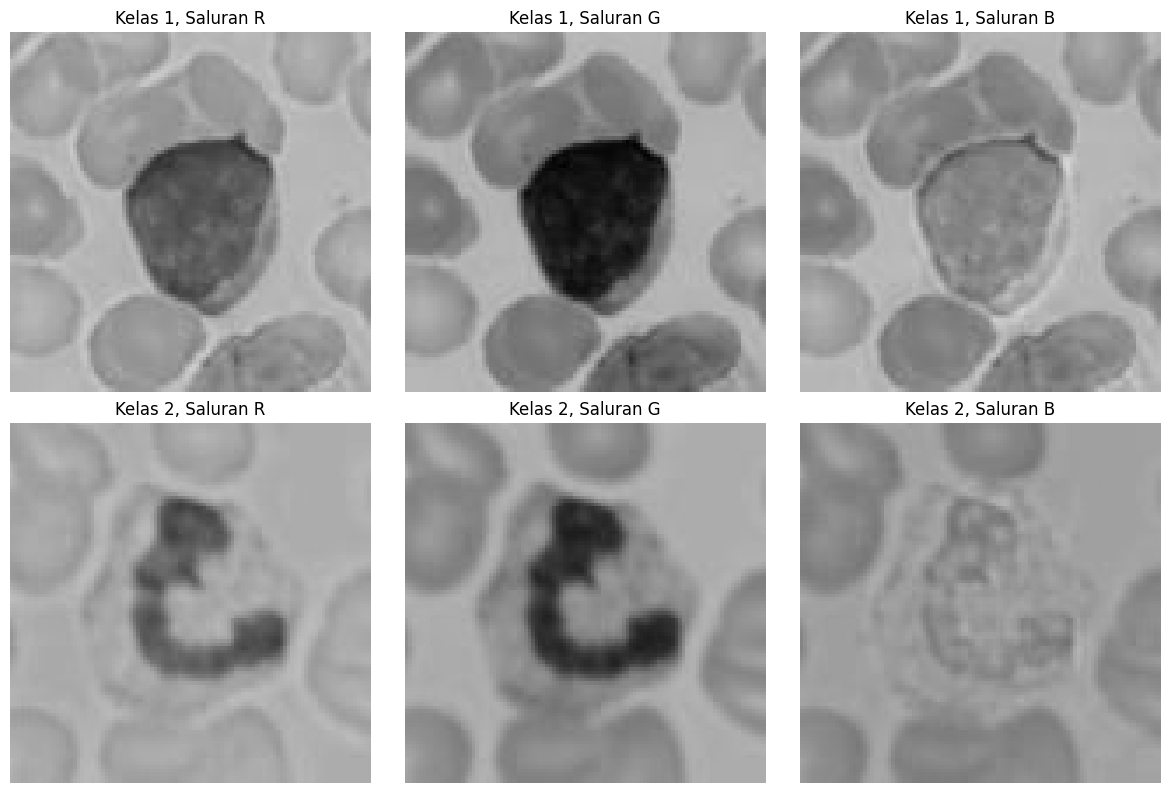

In [58]:
# Path ke direktori ALL_RGB
base_dir = '/content/drive/MyDrive/Biomedika/ALL_RGB'

# Direktori gambar yang sudah dipisahkan
kelas1_paths = {
    'R': os.path.join(base_dir, 'kelas1_R', 'Asli-10_R.jpg'),
    'G': os.path.join(base_dir, 'kelas1_G', 'Asli-10_G.jpg'),
    'B': os.path.join(base_dir, 'kelas1_B', 'Asli-10_B.jpg')
}

kelas2_paths = {
    'R': os.path.join(base_dir, 'kelas2_R', 'Asli-131_R.jpg'),
    'G': os.path.join(base_dir, 'kelas2_G', 'Asli-131_G.jpg'),
    'B': os.path.join(base_dir, 'kelas2_B', 'Asli-131_B.jpg')
}

# Set up plot untuk 2 baris dan 3 kolom
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Fungsi untuk menampilkan gambar
def display_images(axs, img_paths, row):
    for idx, (channel, path) in enumerate(img_paths.items()):
        img = cv2.imread(path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axs[row, idx].imshow(img_rgb)
        axs[row, idx].axis('off')
        axs[row, idx].set_title(f'Kelas {row + 1}, Saluran {channel}')

# Tampilkan gambar untuk kelas 1
display_images(axs, kelas1_paths, 0)

# Tampilkan gambar untuk kelas 2
display_images(axs, kelas2_paths, 1)

# Tampilkan plot
plt.tight_layout()
plt.show()


### **3.2 PERBAIKI CITRA GREEN**

In [59]:
# Path ke direktori sumber
src_kelas1_dir = '/content/drive/MyDrive/Biomedika/ALL_RGB/kelas1_G'
src_kelas2_dir = '/content/drive/MyDrive/Biomedika/ALL_RGB/kelas2_G'

# Path ke direktori tujuan
dst_kelas1_dir = '/content/drive/MyDrive/Biomedika/FixGreen/kelas1'
dst_kelas2_dir = '/content/drive/MyDrive/Biomedika/FixGreen/kelas2'

# Pastikan direktori tujuan tersedia, jika tidak, buat
os.makedirs(dst_kelas1_dir, exist_ok=True)
os.makedirs(dst_kelas2_dir, exist_ok=True)

def fixGreenChannel(src_dir, dst_dir):
    for img_name in os.listdir(src_dir):
        img_path = os.path.join(src_dir, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # Perbaiki saluran G
        g_adjusted = cv2.convertScaleAbs(img, alpha=1.2, beta=10)

        # Ubah nama file dari 'Asli-angka_G.jpg' menjadi 'fixGreen-angka.jpg'
        new_img_name = img_name.replace('Asli-', 'fixGreen-').replace('_G', '')

        # Simpan citra yang sudah diperbaiki
        dst_path = os.path.join(dst_dir, new_img_name)
        cv2.imwrite(dst_path, g_adjusted)

# Perbaiki dan simpan gambar untuk kelas 1
fixGreenChannel(src_kelas1_dir, dst_kelas1_dir)

# Perbaiki dan simpan gambar untuk kelas 2
fixGreenChannel(src_kelas2_dir, dst_kelas2_dir)

print("Proses perbaikan selesai.")


Proses perbaikan selesai.


Menampilkan hasil perbaikan citra Green

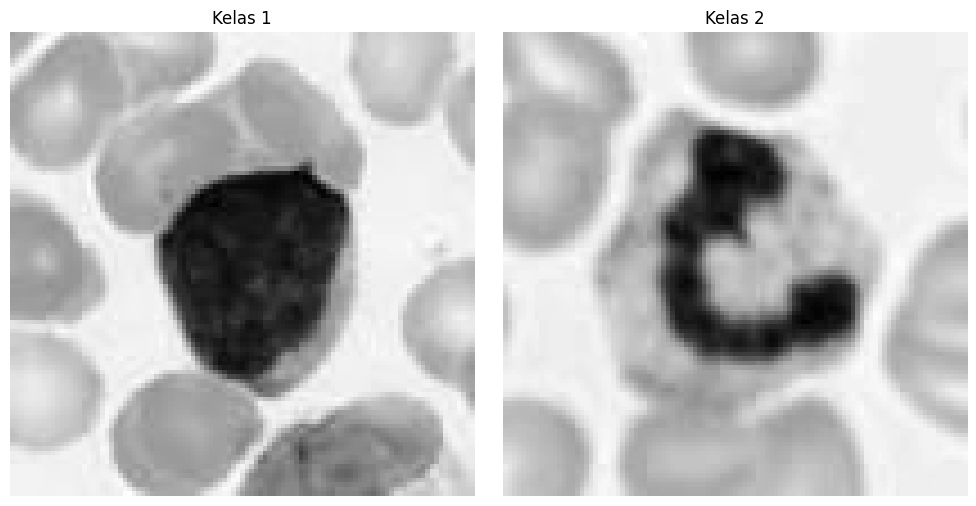

In [60]:
# Path ke direktori gambar yang sudah diperbaiki
kelas1_img_path = '/content/drive/MyDrive/Biomedika/FixGreen/kelas1/fixGreen-10.jpg'
kelas2_img_path = '/content/drive/MyDrive/Biomedika/FixGreen/kelas2/fixGreen-131.jpg'

# Baca gambar
img_kelas1 = cv2.imread(kelas1_img_path, cv2.IMREAD_GRAYSCALE)
img_kelas2 = cv2.imread(kelas2_img_path, cv2.IMREAD_GRAYSCALE)

# Tampilkan gambar
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(img_kelas1, cmap='gray')
axs[0].axis('off')
axs[0].set_title(f'Kelas 1')

axs[1].imshow(img_kelas2, cmap='gray')
axs[1].axis('off')
axs[1].set_title(f'Kelas 2')

plt.tight_layout()
plt.show()


### **3.3 PERBAIKAN CITRA RED**

In [61]:
# Path ke direktori sumber
src_kelas1_dir = '/content/drive/MyDrive/Biomedika/ALL_RGB/kelas1_R'
src_kelas2_dir = '/content/drive/MyDrive/Biomedika/ALL_RGB/kelas2_R'

# Path ke direktori tujuan
dst_kelas1_dir = '/content/drive/MyDrive/Biomedika/FixRed/kelas1'
dst_kelas2_dir = '/content/drive/MyDrive/Biomedika/FixRed/kelas2'

# Pastikan direktori tujuan tersedia, jika tidak, buat
os.makedirs(dst_kelas1_dir, exist_ok=True)
os.makedirs(dst_kelas2_dir, exist_ok=True)

def fixRedChannel(src_dir, dst_dir):
    for img_name in os.listdir(src_dir):
        img_path = os.path.join(src_dir, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # Perbaiki saluran R
        r_adjusted = cv2.convertScaleAbs(img, alpha=1.2, beta=10)

        # Ubah nama file dari 'Asli-angka_G.jpg' menjadi 'fixRed-angka.jpg'
        new_img_name = img_name.replace('Asli-', 'fixRed-').replace('_R', '')

        # Simpan citra yang sudah diperbaiki
        dst_path = os.path.join(dst_dir, new_img_name)
        cv2.imwrite(dst_path, r_adjusted)

# Perbaiki dan simpan gambar untuk kelas 1
fixRedChannel(src_kelas1_dir, dst_kelas1_dir)

# Perbaiki dan simpan gambar untuk kelas 2
fixRedChannel(src_kelas2_dir, dst_kelas2_dir)

print("Proses perbaikan selesai.")


Proses perbaikan selesai.


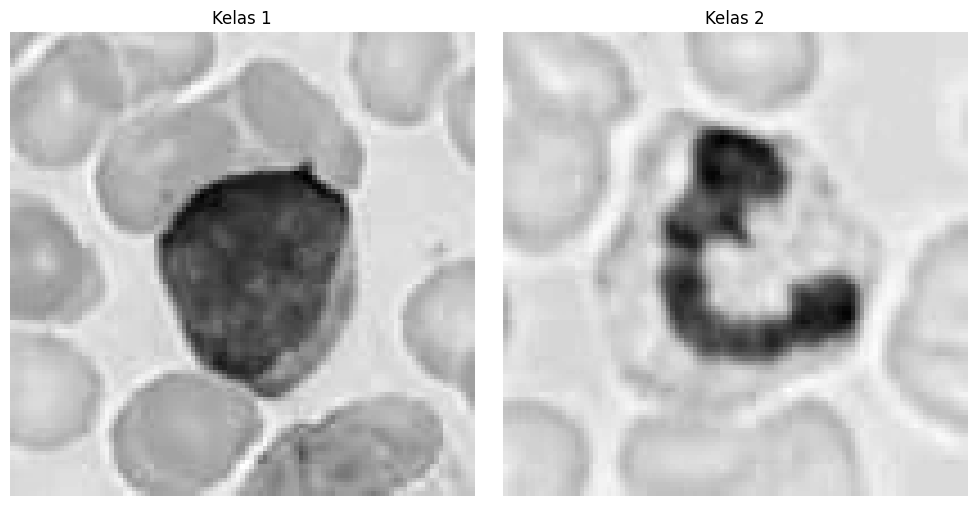

In [62]:
# Path ke direktori gambar yang sudah diperbaiki
kelas1_img_path = '/content/drive/MyDrive/Biomedika/FixRed/kelas1/fixRed-10.jpg'
kelas2_img_path = '/content/drive/MyDrive/Biomedika/FixRed/kelas2/fixRed-131.jpg'

# Baca gambar
img_kelas1 = cv2.imread(kelas1_img_path, cv2.IMREAD_GRAYSCALE)
img_kelas2 = cv2.imread(kelas2_img_path, cv2.IMREAD_GRAYSCALE)

# Tampilkan gambar
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(img_kelas1, cmap='gray')
axs[0].axis('off')
axs[0].set_title(f'Kelas 1')

axs[1].imshow(img_kelas2, cmap='gray')
axs[1].axis('off')
axs[1].set_title(f'Kelas 2')

plt.tight_layout()
plt.show()


### **3.4 GABUNGKAN KEMBALI CITRA**

In [63]:
# Path ke direktori sumber
src_dir_r_kelas1 = '/content/drive/MyDrive/Biomedika/FixRed/kelas1'
src_dir_g_kelas1 = '/content/drive/MyDrive/Biomedika/FixGreen/kelas1'
src_dir_b_kelas1 = '/content/drive/MyDrive/Biomedika/ALL_RGB/kelas1_B'

src_dir_r_kelas2 = '/content/drive/MyDrive/Biomedika/FixRed/kelas2'
src_dir_g_kelas2 = '/content/drive/MyDrive/Biomedika/FixGreen/kelas2'
src_dir_b_kelas2 = '/content/drive/MyDrive/Biomedika/ALL_RGB/kelas2_B'

# Path ke direktori tujuan
dst_kelas1_dir = '/content/drive/MyDrive/Biomedika/Reconstructed/kelas1'
dst_kelas2_dir = '/content/drive/MyDrive/Biomedika/Reconstructed/kelas2'

# Pastikan direktori tujuan tersedia, jika tidak, buat
os.makedirs(dst_kelas1_dir, exist_ok=True)
os.makedirs(dst_kelas2_dir, exist_ok=True)

def combine_channels(src_dir_r, src_dir_g, src_dir_b, dst_dir):
    img_names = os.listdir(src_dir_r)
    for img_name in img_names:
        # Ambil angka dari nama file sebagai base_name
        base_name = ''.join(filter(str.isdigit, img_name))

        # Buat path lengkap untuk setiap channel
        r_name = f'fixRed-{base_name}.jpg'
        r_path = os.path.join(src_dir_r, r_name)

        g_name = f'fixGreen-{base_name}.jpg'
        g_path = os.path.join(src_dir_g, g_name)

        b_name = f'Asli-{base_name}_B.jpg'
        b_path = os.path.join(src_dir_b, b_name)

        # Baca gambar channel R, G, dan B
        r = cv2.imread(r_path, cv2.IMREAD_GRAYSCALE)
        g = cv2.imread(g_path, cv2.IMREAD_GRAYSCALE)
        b = cv2.imread(b_path, cv2.IMREAD_GRAYSCALE)

        # Periksa apakah gambar dapat dibaca
        if r is None or g is None or b is None:
            print(f"Error: Tidak dapat membaca salah satu gambar: {r_path}, {g_path}, atau {b_path}")
            continue

        # Periksa apakah ukuran gambar sesuai
        if r.shape != g.shape or r.shape != b.shape:
            print(f"Error: Ukuran gambar tidak cocok: {r_path}, {g_path}, dan {b_path}")
            continue

        # Gabungkan channel menjadi citra berwarna
        img_combined = cv2.merge([b, g, r])

        # Simpan citra yang sudah digabungkan
        dst_path = os.path.join(dst_dir, f'{base_name}_combined.jpg')
        cv2.imwrite(dst_path, img_combined)

        # Tampilkan path dari gambar R, G, dan B yang digabungkan
        print(f"Gabungkan: R - {r_path}, G - {g_path}, B - {b_path}")

# Gabungkan citra untuk kelas 1
combine_channels(src_dir_r_kelas1, src_dir_g_kelas1, src_dir_b_kelas1, dst_kelas1_dir)

# Gabungkan citra untuk kelas 2
combine_channels(src_dir_r_kelas2, src_dir_g_kelas2, src_dir_b_kelas2, dst_kelas2_dir)

print("Proses penggabungan selesai.")


Gabungkan: R - /content/drive/MyDrive/Biomedika/FixRed/kelas1/fixRed-41.jpg, G - /content/drive/MyDrive/Biomedika/FixGreen/kelas1/fixGreen-41.jpg, B - /content/drive/MyDrive/Biomedika/ALL_RGB/kelas1_B/Asli-41_B.jpg
Gabungkan: R - /content/drive/MyDrive/Biomedika/FixRed/kelas1/fixRed-13.jpg, G - /content/drive/MyDrive/Biomedika/FixGreen/kelas1/fixGreen-13.jpg, B - /content/drive/MyDrive/Biomedika/ALL_RGB/kelas1_B/Asli-13_B.jpg
Gabungkan: R - /content/drive/MyDrive/Biomedika/FixRed/kelas1/fixRed-35.jpg, G - /content/drive/MyDrive/Biomedika/FixGreen/kelas1/fixGreen-35.jpg, B - /content/drive/MyDrive/Biomedika/ALL_RGB/kelas1_B/Asli-35_B.jpg
Gabungkan: R - /content/drive/MyDrive/Biomedika/FixRed/kelas1/fixRed-39.jpg, G - /content/drive/MyDrive/Biomedika/FixGreen/kelas1/fixGreen-39.jpg, B - /content/drive/MyDrive/Biomedika/ALL_RGB/kelas1_B/Asli-39_B.jpg
Gabungkan: R - /content/drive/MyDrive/Biomedika/FixRed/kelas1/fixRed-57.jpg, G - /content/drive/MyDrive/Biomedika/FixGreen/kelas1/fixGreen-5

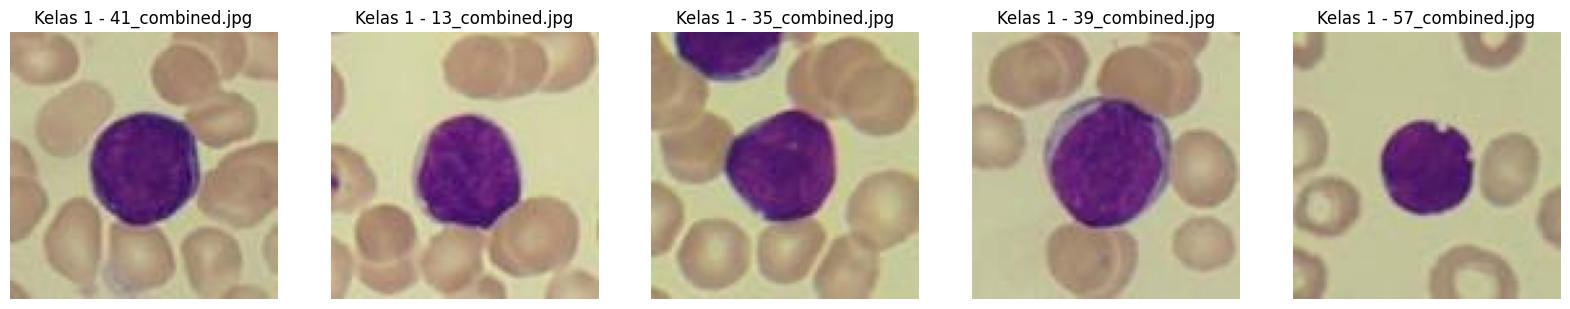

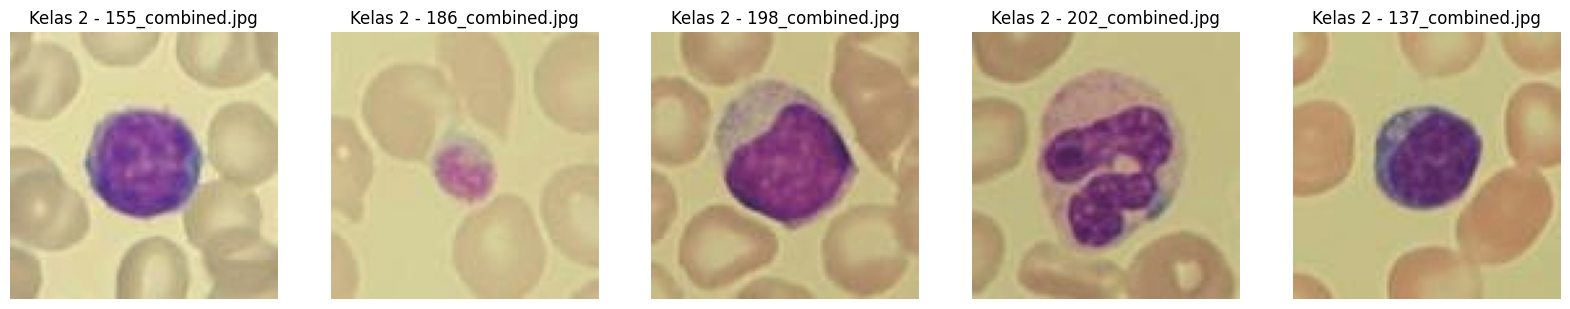

In [64]:
# Fungsi untuk menampilkan gambar
def display_images_from_dir(dir_path, title, num_images=5):
    img_names = os.listdir(dir_path)
    img_names = [name for name in img_names if name.endswith('.jpg')]
    img_names = img_names[:num_images]  # Batasi jumlah gambar yang akan ditampilkan

    plt.figure(figsize=(20, 10))
    for i, img_name in enumerate(img_names):
        img_path = os.path.join(dir_path, img_name)
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(1, num_images, i+1)
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.title(f"{title} - {img_name}")

    plt.show()

# Tampilkan beberapa contoh gambar dari kelas 1
display_images_from_dir(dst_kelas1_dir, 'Kelas 1')

# Tampilkan beberapa contoh gambar dari kelas 2
display_images_from_dir(dst_kelas2_dir, 'Kelas 2')


### **3.5 Konversi HSV**

In [65]:
def convert_to_hsv_channels(src_dir, dst_h_dir, dst_s_dir, dst_v_dir):
    img_names = os.listdir(src_dir)
    for img_name in img_names:
        # Buat path lengkap untuk gambar sumber
        img_path = os.path.join(src_dir, img_name)

        # Baca gambar RGB
        img_rgb = cv2.imread(img_path)

        # Periksa apakah gambar dapat dibaca
        if img_rgb is None:
            print(f"Error: Tidak dapat membaca gambar: {img_path}")
            continue

        # Konversikan gambar dari RGB ke HSV
        img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2HSV)

        # Split gambar HSV menjadi channel H, S, dan V
        h, s, v = cv2.split(img_hsv)

        # Simpan setiap channel ke folder yang sesuai
        h_output_path = os.path.join(dst_h_dir, img_name.replace('_combined.jpg', '_H.jpg'))
        s_output_path = os.path.join(dst_s_dir, img_name.replace('_combined.jpg', '_S.jpg'))
        v_output_path = os.path.join(dst_v_dir, img_name.replace('_combined.jpg', '_V.jpg'))
        cv2.imwrite(h_output_path, h)
        cv2.imwrite(s_output_path, s)
        cv2.imwrite(v_output_path, v)

# Path ke direktori sumber
src_reconstructed_kelas1 = '/content/drive/MyDrive/Biomedika/Reconstructed/kelas1'
src_reconstructed_kelas2 = '/content/drive/MyDrive/Biomedika/Reconstructed/kelas2'

# Path ke direktori tujuan untuk setiap channel
dst_h_channel_kelas1 = '/content/drive/MyDrive/Biomedika/HSV_Channel/kelas1/H'
dst_s_channel_kelas1 = '/content/drive/MyDrive/Biomedika/HSV_Channel/kelas1/S'
dst_v_channel_kelas1 = '/content/drive/MyDrive/Biomedika/HSV_Channel/kelas1/V'

dst_h_channel_kelas2 = '/content/drive/MyDrive/Biomedika/HSV_Channel/kelas2/H'
dst_s_channel_kelas2 = '/content/drive/MyDrive/Biomedika/HSV_Channel/kelas2/S'
dst_v_channel_kelas2 = '/content/drive/MyDrive/Biomedika/HSV_Channel/kelas2/V'

# Pastikan direktori tujuan tersedia, jika tidak, buat
os.makedirs(dst_h_channel_kelas1, exist_ok=True)
os.makedirs(dst_s_channel_kelas1, exist_ok=True)
os.makedirs(dst_v_channel_kelas1, exist_ok=True)

os.makedirs(dst_h_channel_kelas2, exist_ok=True)
os.makedirs(dst_s_channel_kelas2, exist_ok=True)
os.makedirs(dst_v_channel_kelas2, exist_ok=True)

# Konversikan gambar untuk kelas 1
convert_to_hsv_channels(src_reconstructed_kelas1, dst_h_channel_kelas1, dst_s_channel_kelas1, dst_v_channel_kelas1)

# Konversikan gambar untuk kelas 2
convert_to_hsv_channels(src_reconstructed_kelas2, dst_h_channel_kelas2, dst_s_channel_kelas2, dst_v_channel_kelas2)

print("Proses konversi ke semua channel H, S, V selesai.")


Proses konversi ke semua channel H, S, V selesai.


Menampilkan hasil H S dan V

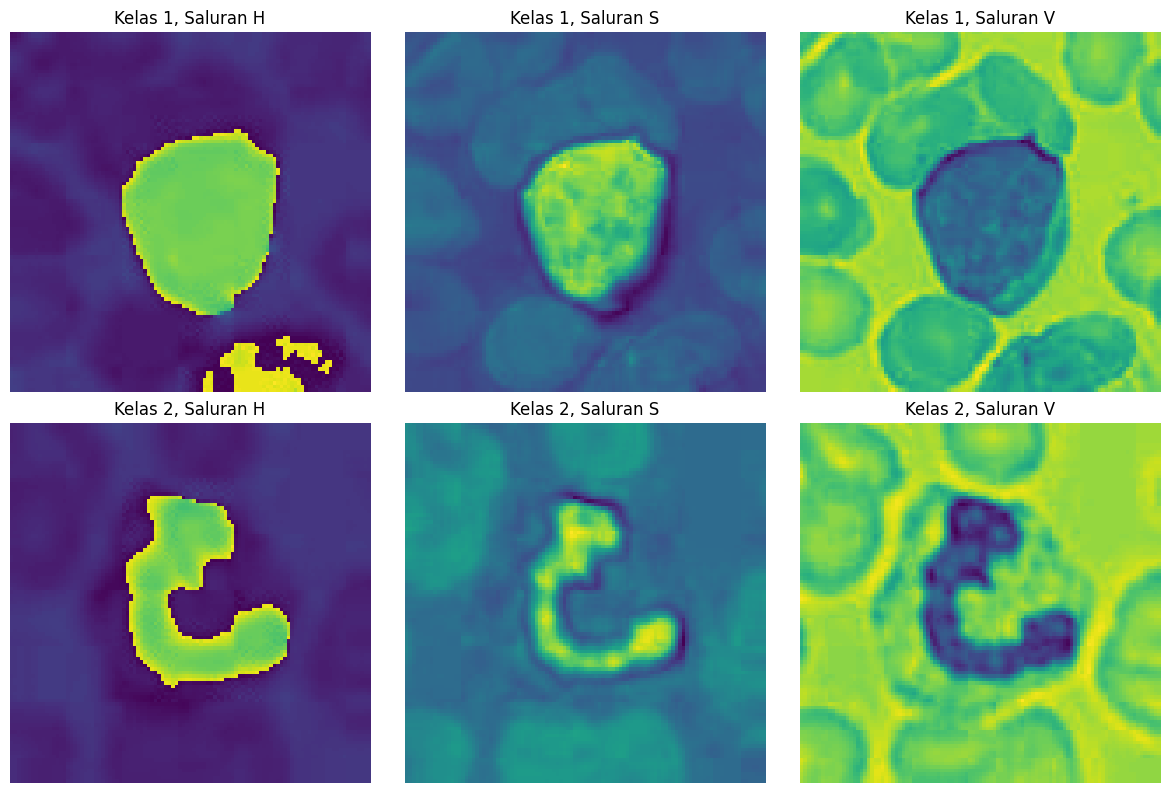

In [66]:
# Path ke direktori HSV Channel
base_dir = '/content/drive/MyDrive/Biomedika/HSV_Channel'

# Direktori gambar yang sudah dipisahkan
kelas1_paths = {
    'H': os.path.join(base_dir, 'kelas1', 'H', '10_H.jpg'),
    'S': os.path.join(base_dir, 'kelas1', 'S', '10_S.jpg'),
    'V': os.path.join(base_dir, 'kelas1', 'V', '10_V.jpg')
}

kelas2_paths = {
    'H': os.path.join(base_dir, 'kelas2', 'H', '131_H.jpg'),
    'S': os.path.join(base_dir, 'kelas2', 'S', '131_S.jpg'),
    'V': os.path.join(base_dir, 'kelas2', 'V', '131_V.jpg')
}

# Set up plot untuk 2 baris dan 3 kolom
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Fungsi untuk menampilkan gambar
def display_images(axs, img_paths, row):
    for idx, (channel, path) in enumerate(img_paths.items()):
        img = mpimg.imread(path)
        axs[row, idx].imshow(img)
        axs[row, idx].axis('off')
        axs[row, idx].set_title(f'Kelas {row + 1}, Saluran {channel}')

# Tampilkan gambar untuk kelas 1
display_images(axs, kelas1_paths, 0)

# Tampilkan gambar untuk kelas 2
display_images(axs, kelas2_paths, 1)

# Tampilkan plot
plt.tight_layout()
plt.show()


### **3.6 Pilih channel H - Terapkan Median Filtering**

In [67]:
# Fungsi untuk mengekstrak angka dari nama file
def extract_number(filename):
    # Pisahkan nama file menjadi bagian yang terpisah oleh '-'
    parts = filename.split('-')
    # Ambil bagian terakhir dari hasil splitting
    last_part = parts[-1]
    # Ambil angka dari bagian terakhir
    number = ''.join(filter(str.isdigit, last_part))
    return number

# Fungsi untuk menerapkan median filtering
def apply_median_filtering(input_dir, output_dir, size_of_mask):
    # Pastikan output_dir ada
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Loop melalui setiap file di direktori input
    for filename in os.listdir(input_dir):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # Baca gambar
            input_path = os.path.join(input_dir, filename)
            img = cv2.imread(input_path)

            # Terapkan median filtering
            median_filtered_img = cv2.medianBlur(img, size_of_mask)

            # Dapatkan angka dari nama file asli
            angka = extract_number(filename)

            # Simpan gambar hasil median filtering dengan nama yang diinginkan
            output_filename = f"medianFiltering-{angka}.jpg"
            output_path = os.path.join(output_dir, output_filename)
            cv2.imwrite(output_path, median_filtered_img)

# Direktori input dan output untuk kelas1
input_dir_kelas1 = "/content/drive/MyDrive/Biomedika/HSV_Channel/kelas1/H"
output_dir_kelas1 = "/content/drive/MyDrive/Biomedika/Median_Filtering/kelas1"

# Direktori input dan output untuk kelas2
input_dir_kelas2 = "/content/drive/MyDrive/Biomedika/HSV_Channel/kelas2/H"
output_dir_kelas2 = "/content/drive/MyDrive/Biomedika/Median_Filtering/kelas2"

# Ukuran masker median filtering
size_of_mask = 1  # Misalnya 3x3

# Terapkan median filtering dan simpan hasilnya untuk kelas1
apply_median_filtering(input_dir_kelas1, output_dir_kelas1, size_of_mask)

# Terapkan median filtering dan simpan hasilnya untuk kelas2
apply_median_filtering(input_dir_kelas2, output_dir_kelas2, size_of_mask)

print("Berhasil menerapkan median filtering")


Berhasil menerapkan median filtering


Menampilkan hasil median filtering

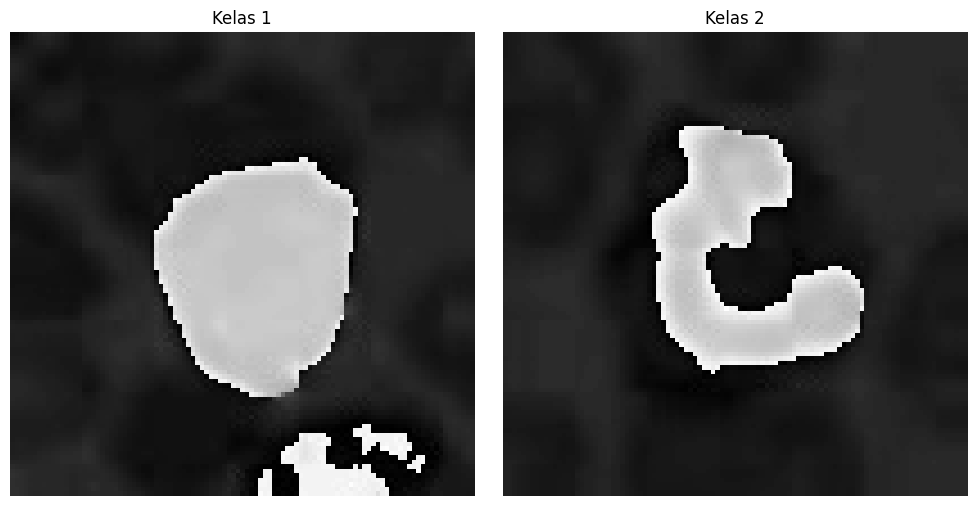

In [68]:
# Path ke direktori gambar yang sudah diperbaiki
kelas1_img_path = '/content/drive/MyDrive/Biomedika/Median_Filtering/kelas1/medianFiltering-10.jpg'
kelas2_img_path = '/content/drive/MyDrive/Biomedika/Median_Filtering/kelas2/medianFiltering-131.jpg'

# Baca gambar
img_kelas1 = cv2.imread(kelas1_img_path, cv2.IMREAD_GRAYSCALE)
img_kelas2 = cv2.imread(kelas2_img_path, cv2.IMREAD_GRAYSCALE)

# Tampilkan gambar
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(img_kelas1, cmap='gray')
axs[0].axis('off')
axs[0].set_title(f'Kelas 1')

axs[1].imshow(img_kelas2, cmap='gray')
axs[1].axis('off')
axs[1].set_title(f'Kelas 2')

plt.tight_layout()
plt.show()


### **3.7 Konversi ke Biner**

In [69]:
# Fungsi untuk mengubah citra menjadi citra biner menggunakan metode Otsu
def apply_thresholding(input_dir, output_dir):
    # Pastikan output_dir ada
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Loop melalui setiap file di direktori input
    for filename in os.listdir(input_dir):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # Baca gambar
            input_path = os.path.join(input_dir, filename)
            img = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)

            # Terapkan thresholding Otsu
            _, binarized_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

            # Dapatkan angka dari nama file asli
            angka = extract_number(filename)

            # Simpan citra biner dengan nama yang diinginkan
            output_filename = f"citraBiner-{angka}.jpg"
            output_path = os.path.join(output_dir, output_filename)
            cv2.imwrite(output_path, binarized_img)

# Fungsi untuk mengekstrak angka dari nama file
def extract_number(filename):
    # Pisahkan nama file menjadi bagian yang terpisah oleh '-'
    parts = filename.split('-')
    # Ambil bagian terakhir dari hasil splitting
    last_part = parts[-1]
    # Ambil angka dari bagian terakhir
    number = ''.join(filter(str.isdigit, last_part))
    return number

# Direktori input dan output untuk kelas1
input_dir_kelas1 = "/content/drive/MyDrive/Biomedika/Median_Filtering/kelas1"
output_dir_kelas1 = "/content/drive/MyDrive/Biomedika/Citra_biner/kelas1"

# Direktori input dan output untuk kelas2
input_dir_kelas2 = "/content/drive/MyDrive/Biomedika/Median_Filtering/kelas2"
output_dir_kelas2 = "/content/drive/MyDrive/Biomedika/Citra_biner/kelas2"

# Terapkan thresholding dan simpan hasilnya untuk kelas1
apply_thresholding(input_dir_kelas1, output_dir_kelas1)

# Terapkan thresholding dan simpan hasilnya untuk kelas2
apply_thresholding(input_dir_kelas2, output_dir_kelas2)

print("Berhasil mengubah citra menjadi citra biner")

Berhasil mengubah citra menjadi citra biner


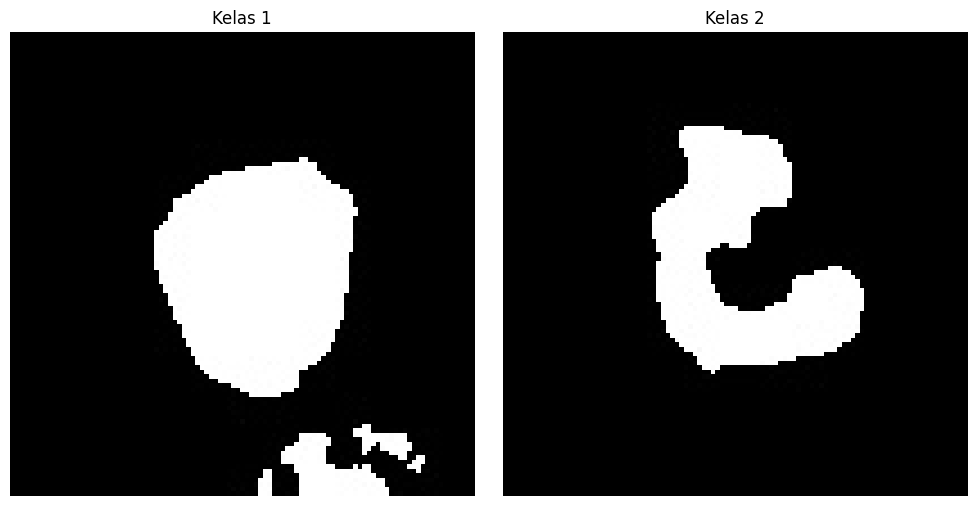

In [70]:
# Path ke direktori gambar yang sudah diperbaiki
kelas1_img_path = '/content/drive/MyDrive/Biomedika/Citra_biner/kelas1/citraBiner-10.jpg'
kelas2_img_path = '/content/drive/MyDrive/Biomedika/Citra_biner/kelas2/citraBiner-131.jpg'

# Baca gambar
img_kelas1 = cv2.imread(kelas1_img_path, cv2.IMREAD_GRAYSCALE)
img_kelas2 = cv2.imread(kelas2_img_path, cv2.IMREAD_GRAYSCALE)

# Tampilkan gambar
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(img_kelas1, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Kelas 1')

axs[1].imshow(img_kelas2, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Kelas 2')

plt.tight_layout()
plt.show()


### **3.8 MORFOLOGI**

In [71]:
# Fungsi untuk melakukan morfologi citra
def apply_morphology(input_dir, output_dir):
    # Pastikan output_dir ada
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Loop melalui setiap file di direktori input
    for filename in os.listdir(input_dir):
        if filename.endswith('.jpg'):
            # Baca citra biner
            input_path = os.path.join(input_dir, filename)
            biner_ori = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)

            # Isi lubang pada citra biner
            biner_filled = fill_holes(biner_ori)

            # Morfologi operasi penutupan
            kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))  # Ubah kernel sesuai kebutuhan
            biner_closed = cv2.morphologyEx(biner_filled, cv2.MORPH_CLOSE, kernel)

            # Ubah nama file output
            output_filename = filename.replace('citraBiner', 'citraMorfologi')

            # Simpan hasil citra biner setelah morfologi
            output_path = os.path.join(output_dir, output_filename)
            cv2.imwrite(output_path, biner_closed)

# Fungsi untuk mengisi lubang pada citra biner
def fill_holes(biner):
    # Invers citra biner
    biner_inv = cv2.bitwise_not(biner)

    # Temukan area yang terhubung dengan background
    connectivity = 4
    _, labels, stats, _ = cv2.connectedComponentsWithStats(biner_inv, connectivity, cv2.CV_32S)

    # Isi area yang terhubung dengan background
    for label in range(1, len(stats)):
        if stats[label, cv2.CC_STAT_AREA] < 5000:  # Ubah nilai ambang sesuai kebutuhan
            biner_inv[labels == label] = 255

    # Invers kembali citra biner
    biner_filled = cv2.bitwise_not(biner_inv)
    return biner_filled

# Direktori input dan output untuk kelas1
input_dir_kelas1 = "/content/drive/MyDrive/Biomedika/Citra_biner/kelas1"
output_dir_kelas1 = "/content/drive/MyDrive/Biomedika/Citra_morfologi/kelas1"

# Direktori input dan output untuk kelas2
input_dir_kelas2 = "/content/drive/MyDrive/Biomedika/Citra_biner/kelas2"
output_dir_kelas2 = "/content/drive/MyDrive/Biomedika/Citra_morfologi/kelas2"

# Terapkan morfologi pada citra biner untuk kelas1
apply_morphology(input_dir_kelas1, output_dir_kelas1)

# Terapkan morfologi pada citra biner untuk kelas2
apply_morphology(input_dir_kelas2, output_dir_kelas2)

print("Berhasil menerapkan morfologi pada citra")


Berhasil menerapkan morfologi pada citra


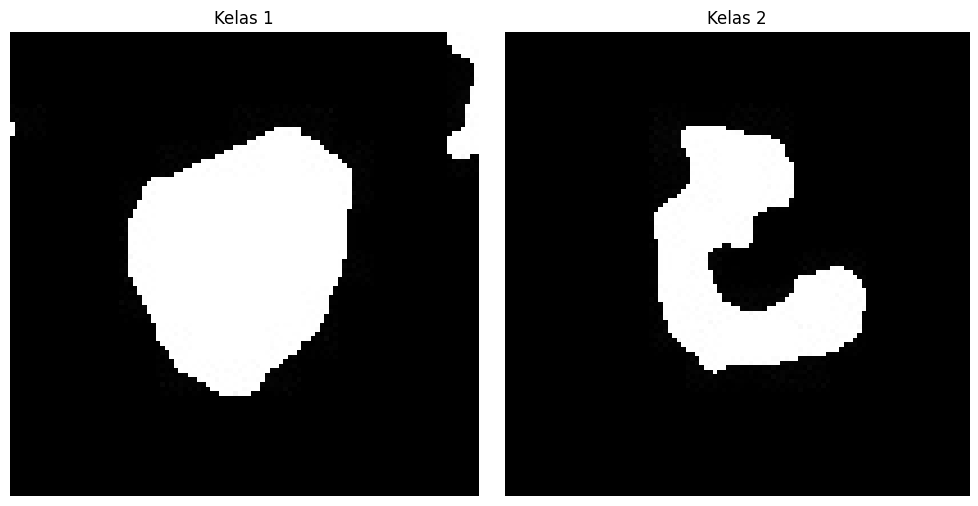

In [72]:
# Path ke direktori gambar yang sudah diperbaiki
kelas1_img_path = '/content/drive/MyDrive/Biomedika/Citra_morfologi/kelas1/citraMorfologi-103.jpg'
kelas2_img_path = '/content/drive/MyDrive/Biomedika/Citra_morfologi/kelas2/citraMorfologi-131.jpg'

# Baca gambar
img_kelas1 = cv2.imread(kelas1_img_path, cv2.IMREAD_GRAYSCALE)
img_kelas2 = cv2.imread(kelas2_img_path, cv2.IMREAD_GRAYSCALE)

# Tampilkan gambar
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(img_kelas1, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Kelas 1')

axs[1].imshow(img_kelas2, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Kelas 2')

plt.tight_layout()
plt.show()


### **3.9 Lakukan pelabelan dan pilih luas paling maksimal**

In [73]:
# Fungsi untuk melakukan pelabelan, pemilihan luas maksimal, dan operasi morfologi
def select_max_area_and_apply_morphology(input_dir, output_dir, kernel_size=(5, 5)):
    # Pastikan output_dir ada
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Loop melalui setiap file di direktori input
    for filename in os.listdir(input_dir):
        if filename.endswith('.jpg'):
            # Baca citra biner
            input_path = os.path.join(input_dir, filename)
            biner = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)

            # Pelabelan
            num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(biner)

            # Jika ada lebih dari satu label (label 0 adalah background)
            if num_labels > 1:
                # Hitung luas dari setiap komponen (abaikan label 0 yang adalah background)
                luas = stats[1:, cv2.CC_STAT_AREA]

                # Simpan semua luas area putih ke dalam variabel
                semua_luas_area_putih = luas.tolist()

                # Pilih luas maksimal dan indeksnya
                maxLuas = np.max(luas)
                index = np.argmax(luas) + 1  # Tambah 1 karena kita mengabaikan label 0

                # Buat citra baru hanya dengan area maksimal
                binerAkhir = np.zeros_like(biner)
                binerAkhir[labels == index] = 255

                # Gambar area selain maksimal menjadi hitam (latar belakang)
                output_image = np.zeros_like(biner)
                output_image[labels == index] = biner[labels == index]

                # Terapkan operasi morfologi (misalnya dilasi)
                kernel = np.ones(kernel_size, np.uint8)
                output_image_morph = cv2.dilate(output_image, kernel, iterations=1)

                # Ganti nama file output menjadi 'citraMaksimal-angka.jpg'
                new_filename = filename.replace('citraMorfologi', 'citraMaksimal')

                # Simpan hasil citra biner dengan latar belakang hitam dan objek putih
                output_path = os.path.join(output_dir, new_filename)
                cv2.imwrite(output_path, output_image_morph)

                print(f"File: {filename}, Semua Luas Area Putih: {semua_luas_area_putih}, Luas Maksimal: {maxLuas}")

# Direktori input dan output untuk kelas1
input_dir_kelas1 = "/content/drive/MyDrive/Biomedika/Citra_morfologi/kelas1"
output_dir_kelas1 = "/content/drive/MyDrive/Biomedika/Citra_maksimum/kelas1"

# Direktori input dan output untuk kelas2
input_dir_kelas2 = "/content/drive/MyDrive/Biomedika/Citra_morfologi/kelas2"
output_dir_kelas2 = "/content/drive/MyDrive/Biomedika/Citra_maksimum/kelas2"

# Lakukan pelabelan dan pilih luas maksimal serta operasi morfologi untuk kelas1
select_max_area_and_apply_morphology(input_dir_kelas1, output_dir_kelas1)

# Lakukan pelabelan dan pilih luas maksimal serta operasi morfologi untuk kelas2
select_max_area_and_apply_morphology(input_dir_kelas2, output_dir_kelas2)

print("Berhasil melakukan pelabelan, pemilihan luas maksimal, dan operasi morfologi pada citra")


File: citraMorfologi-41.jpg, Semua Luas Area Putih: [2023], Luas Maksimal: 2023
File: citraMorfologi-13.jpg, Semua Luas Area Putih: [1930, 100], Luas Maksimal: 1930
File: citraMorfologi-35.jpg, Semua Luas Area Putih: [943, 1910, 1, 1], Luas Maksimal: 1910
File: citraMorfologi-39.jpg, Semua Luas Area Putih: [2434, 1], Luas Maksimal: 2434
File: citraMorfologi-57.jpg, Semua Luas Area Putih: [1429, 1], Luas Maksimal: 1429
File: citraMorfologi-18.jpg, Semua Luas Area Putih: [3100, 2, 1], Luas Maksimal: 3100
File: citraMorfologi-12.jpg, Semua Luas Area Putih: [2639, 1, 2], Luas Maksimal: 2639
File: citraMorfologi-30.jpg, Semua Luas Area Putih: [2969], Luas Maksimal: 2969
File: citraMorfologi-16.jpg, Semua Luas Area Putih: [2425], Luas Maksimal: 2425
File: citraMorfologi-45.jpg, Semua Luas Area Putih: [103, 2177, 4], Luas Maksimal: 2177
File: citraMorfologi-8.jpg, Semua Luas Area Putih: [201, 2144, 2, 560], Luas Maksimal: 2144
File: citraMorfologi-31.jpg, Semua Luas Area Putih: [1830], Luas M

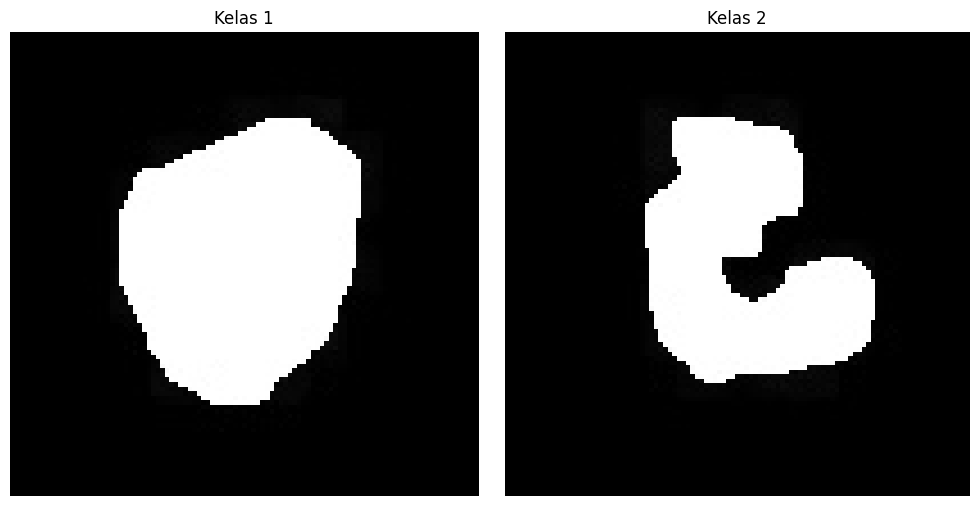

In [74]:
# Path ke direktori gambar yang sudah diperbaiki
kelas1_img_path = '/content/drive/MyDrive/Biomedika/Citra_maksimum/kelas1/citraMaksimal-103.jpg'
kelas2_img_path = '/content/drive/MyDrive/Biomedika/Citra_maksimum/kelas2/citraMaksimal-131.jpg'

# Baca gambar
img_kelas1 = cv2.imread(kelas1_img_path, cv2.IMREAD_GRAYSCALE)
img_kelas2 = cv2.imread(kelas2_img_path, cv2.IMREAD_GRAYSCALE)

# Tampilkan gambar
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(img_kelas1, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Kelas 1')

axs[1].imshow(img_kelas2, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Kelas 2')

plt.tight_layout()
plt.show()


# **4. EKSTRAKSI FITUR - GLCM**

1. jarak 1 sudut 0
2. jarak 1 sudut 90
3. jarak 2 sudut 45
4. jarak 2 sudut 135

In [75]:
import os
import numpy as np
import pandas as pd
import cv2
from skimage.feature import graycomatrix, graycoprops

def calculate_glcm_features(image):
    """
    Menghitung fitur GLCM untuk gambar yang diberikan.

    Parameter:
    - image: Gambar input dalam format BGR.

    Mengembalikan:
    - Daftar nilai fitur GLCM.
    """
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    distances = [1, 2]
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
    glcm = graycomatrix(gray_image, distances, angles, symmetric=True, normed=True)

    features = []
    target_combinations = [(1, 0), (1, np.pi/2), (2, np.pi/4), (2, 3*np.pi/4)]
    for prop in ['contrast', 'energy', 'homogeneity', 'correlation']:
        feature_values = graycoprops(glcm, prop)
        for distance, angle in target_combinations:
            d_idx = distances.index(distance)
            a_idx = angles.index(angle)
            features.append(feature_values[d_idx, a_idx])

    return features

def process_images(input_dir, label):
    """
    Memproses gambar dalam direktori yang ditentukan dan menghitung fitur GLCM.

    Parameter:
    - input_dir: Direktori yang berisi gambar.
    - label: Label yang akan dikaitkan dengan setiap gambar.

    Mengembalikan:
    - Daftar yang berisi fitur GLCM dan label yang terkait untuk setiap gambar.
    """
    if not os.path.exists(input_dir):
        raise FileNotFoundError(f"Direktori tidak ditemukan: {input_dir}")

    image_files = os.listdir(input_dir)
    data = []

    for file in image_files:
        image_path = os.path.join(input_dir, file)
        if not os.path.isfile(image_path):
            continue
        image = cv2.imread(image_path)
        if image is None:
            print(f"Peringatan: Tidak dapat membaca gambar {image_path}")
            continue
        features = calculate_glcm_features(image)
        data.append(features + [label])

    return data

def save_to_excel(data, output_file):
    """
    Menyimpan data fitur GLCM ke file Excel.

    Parameter:
    - data: Daftar yang berisi fitur GLCM dan label.
    - output_file: Path ke file Excel output.
    """
    target_combinations = [(1, 0), (1, np.pi/2), (2, np.pi/4), (2, 3*np.pi/4)]
    columns = []
    for distance, angle in target_combinations:
        angle_deg = int(np.degrees(angle))
        for prop in ['Contrast', 'Energy', 'Homogeneity', 'Correlation']:
            columns.append(f'{prop}_d{distance}_a{angle_deg}')
    columns.append('Class')

    df = pd.DataFrame(data, columns=columns)
    df.to_excel(output_file, index=False)

# Menentukan direktori input
input_dir_kelas1 = "/content/drive/MyDrive/Biomedika/Citra_maksimum/kelas1"
input_dir_kelas2 = "/content/drive/MyDrive/Biomedika/Citra_maksimum/kelas2"

# Memproses gambar dan menghitung fitur GLCM
data_kelas1 = process_images(input_dir_kelas1, label='1')
data_kelas2 = process_images(input_dir_kelas2, label='2')

# Pastikan jumlah data yang dihasilkan
print(f"Jumlah data kelas1: {len(data_kelas1)}")
print(f"Jumlah data kelas2: {len(data_kelas2)}")

# Menyimpan fitur GLCM ke Excel di direktori yang ditentukan
output_file = "/content/drive/MyDrive/Biomedika/glcm_features.xlsx"
save_to_excel(data_kelas1 + data_kelas2, output_file)

print(f"Data GLCM berhasil disimpan di {output_file}")


Jumlah data kelas1: 130
Jumlah data kelas2: 130
Data GLCM berhasil disimpan di /content/drive/MyDrive/Biomedika/glcm_features.xlsx


# **5. KLASIFIKASI - NAIVE BAYES**

### **5.1 MEMBACA DATA**

In [76]:
# Path ke file Excel
file_path = "/content/drive/MyDrive/Biomedika/glcm_features.xlsx"

# Membaca data dari file Excel
data = pd.read_excel(file_path)

# Menampilkan data dalam bentuk tabel
display(data)

,Contrast_d1_a0,Energy_d1_a0,Homogeneity_d1_a0,Correlation_d1_a0,Contrast_d1_a90,Energy_d1_a90,Homogeneity_d1_a90,Correlation_d1_a90,Contrast_d2_a45,Energy_d2_a45,Homogeneity_d2_a45,Correlation_d2_a45,Contrast_d2_a135,Energy_d2_a135,Homogeneity_d2_a135,Correlation_d2_a135,Class
0,590.390063,554.292024,896.107074,871.981353,0.721968,0.719655,0.716843,0.716697,0.905303,0.900341,0.896034,0.896523,0.969415,0.971285,0.953925,0.955166,1
1,576.641157,541.492861,834.496540,858.279316,0.741418,0.742223,0.735805,0.734629,0.918925,0.919461,0.909859,0.907419,0.969386,0.971252,0.956032,0.954779,1
2,590.589568,549.532077,858.492118,833.509996,0.740546,0.741659,0.737033,0.737501,0.917089,0.915498,0.908295,0.908978,0.968678,0.970856,0.954816,0.956130,1
3,670.802018,626.511517,989.766820,917.307190,0.688189,0.690029,0.683109,0.683755,0.903115,0.904418,0.893402,0.893669,0.970542,0.972487,0.956831,0.959991,1
4,494.267276,470.539311,752.219146,751.188389,0.800199,0.799077,0.793838,0.794133,0.925329,0.928083,0.916605,0.916786,0.966885,0.968475,0.950016,0.950085,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,623.236056,620.283838,946.635333,934.909842,0.704784,0.705479,0.700634,0.699896,0.911865,0.917318,0.905324,0.905203,0.971284,0.971420,0.956690,0.957227,2
256,577.488292,449.662859,789.431565,800.393118,0.774786,0.776384,0.768546,0.769060,0.925178,0.930640,0.915902,0.917014,0.964229,0.972147,0.951493,0.950819,2
257,560.182182,589.784885,855.853326,879.037678,0.727730,0.725666,0.720455,0.720992,0.911473,0.908920,0.899260,0.898541,0.971018,0.969486,0.956052,0.954862,2
258,1140.486579,976.348372,1578.417916,1580.299116,0.615758,0.617470,0.613308,0.613312,0.851490,0.853254,0.845361,0.844288,0.954555,0.961095,0.937491,0.937416,2


In [77]:
dt = data.groupby("Class")
kelas1 = dt["Class"].count()[1]
kelas2 = dt["Class"].count()[2]
dt["Class"].count()

Class
1    130
2    130
Name: Class, dtype: int64

### **5.2 NORMALISASI DATA**

In [78]:
# Memisahkan fitur (X) dan label (y)
X = data.drop(columns=['Class'])
y = data['Class']

# Normalisasi fitur menggunakan Min-Max Scaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Mengambil nama kolom dari data asli
column_names = X.columns.tolist()

# Membuat DataFrame baru dengan data yang telah dinormalisasi
data_normalized = pd.DataFrame(X_normalized, columns=column_names)

# Menambahkan kolom 'Class' kembali ke DataFrame yang telah dinormalisasi
data_normalized['Class'] = y.values

# Menampilkan data setelah normalisasi
print("Data setelah normalisasi:")
display(data_normalized)

Data setelah normalisasi:


,Contrast_d1_a0,Energy_d1_a0,Homogeneity_d1_a0,Correlation_d1_a0,Contrast_d1_a90,Energy_d1_a90,Homogeneity_d1_a90,Correlation_d1_a90,Contrast_d2_a45,Energy_d2_a45,Homogeneity_d2_a45,Correlation_d2_a45,Contrast_d2_a135,Energy_d2_a135,Homogeneity_d2_a135,Correlation_d2_a135,Class
0,0.313355,0.271841,0.281917,0.261826,0.488381,0.477709,0.478894,0.478519,0.552364,0.532178,0.548921,0.561856,0.805296,0.869395,0.821001,0.881536,1
1,0.301695,0.261727,0.249942,0.255043,0.536876,0.533897,0.526118,0.523097,0.643585,0.657161,0.632618,0.626556,0.804597,0.868474,0.855655,0.874085,1
2,0.313524,0.268080,0.262395,0.242782,0.534702,0.532491,0.529177,0.530237,0.631287,0.631260,0.623149,0.635815,0.787809,0.857569,0.835646,0.900103,1
3,0.381549,0.328910,0.330524,0.284265,0.404156,0.403951,0.394879,0.396623,0.537709,0.558829,0.532990,0.544903,0.832052,0.902510,0.868794,0.974412,1
4,0.231837,0.205659,0.207242,0.202029,0.683441,0.675442,0.670652,0.671026,0.686468,0.713519,0.673459,0.682179,0.745251,0.791987,0.756688,0.783727,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.341210,0.323989,0.308140,0.292979,0.445534,0.442416,0.438525,0.436750,0.596308,0.643153,0.605165,0.613400,0.849661,0.873117,0.866487,0.921206,2
256,0.302413,0.189162,0.226555,0.226387,0.620076,0.618945,0.607661,0.608695,0.685456,0.730234,0.669198,0.683535,0.682207,0.893137,0.780986,0.797874,2
257,0.287737,0.299888,0.261026,0.265320,0.502748,0.492675,0.487888,0.489195,0.593682,0.588257,0.568450,0.573838,0.843335,0.819839,0.855988,0.875680,2
258,0.779868,0.605356,0.636021,0.612473,0.223558,0.223308,0.221035,0.221499,0.192005,0.224385,0.242152,0.251666,0.452580,0.588702,0.550628,0.539874,2


### **5.3 MEMISAHKAN FITUR DAN TARGET**

In [79]:
X = data_normalized.iloc[:,0:-1].values
y = data_normalized.iloc[:, -1].values

print('jumlah data = ', X.shape)
print('jumlah data =', y.shape)

jumlah data =  (260, 16)
jumlah data = (260,)


### **5.4 SPLITTING DATA**

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2 , stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(208, 16)
(208,)
(52, 16)
(52,)


### **5.5 MODEL NAIVE BAYES**

In [81]:
# Inisialisasi KFold
kf = KFold(n_splits=10, shuffle=True, random_state=2)

best_model = None
best_accuracy = 0

# Loop melalui setiap fold
for fold_num, (train_index, val_index) in enumerate(kf.split(X_train), start=1):
    X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
    y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]

    # Inisialisasi model Naive Bayes
    modelNB = GaussianNB()

    # Latih model dengan data pelatihan
    modelNB.fit(X_fold_train, y_fold_train)

    # Lakukan prediksi menggunakan data validasi
    y_fold_pred = modelNB.predict(X_fold_val)

    # Evaluasi kinerja model
    fold_accuracy = accuracy_score(y_fold_val, y_fold_pred)
    print(f"Akurasi model pada fold {fold_num}: {fold_accuracy}")

    # Simpan model terbaik
    if fold_accuracy > best_accuracy:
        best_accuracy = fold_accuracy
        best_model = modelNB

print("Akurasi model terbaik dari k-fold cross validation:", best_accuracy)

Akurasi model pada fold 1: 0.7142857142857143
Akurasi model pada fold 2: 0.7142857142857143
Akurasi model pada fold 3: 0.9047619047619048
Akurasi model pada fold 4: 0.6666666666666666
Akurasi model pada fold 5: 0.8095238095238095
Akurasi model pada fold 6: 0.5238095238095238
Akurasi model pada fold 7: 0.5714285714285714
Akurasi model pada fold 8: 0.7619047619047619
Akurasi model pada fold 9: 0.9
Akurasi model pada fold 10: 0.6
Akurasi model terbaik dari k-fold cross validation: 0.9047619047619048


### **5.6 PREDIKSI**

In [82]:
# Lakukan prediksi menggunakan data uji dengan model terbaik
y_pred = best_model.predict(X_test)

# Evaluasi kinerja model terbaik pada data uji
final_accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model terbaik pada data uji:", final_accuracy)

Akurasi model terbaik pada data uji: 0.7884615384615384


### **5.1 CONFUSION MATRIKS**

In [83]:
kinerja_model = classification_report(y_test, y_pred)
print(kinerja_model)

              precision    recall  f1-score   support

           1       0.74      0.88      0.81        26
           2       0.86      0.69      0.77        26

    accuracy                           0.79        52
   macro avg       0.80      0.79      0.79        52
weighted avg       0.80      0.79      0.79        52



**hasil kinerja manual**


In [84]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Mencetak nilai TP, TN, FN, FP
TP = cm[1, 1]
TN = cm[0, 0]
FN = cm[1, 0]
FP = cm[0, 1]
print("True Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Negative (FN):", FN)
print("False Positive (FP):", FP)

# Menghitung akurasi, presisi, recall, dan F1-score secara manual
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

True Positive (TP): 18
True Negative (TN): 23
False Negative (FN): 8
False Positive (FP): 3
Accuracy: 0.7884615384615384
Precision: 0.8571428571428571
Recall: 0.6923076923076923
F1-Score: 0.7659574468085107


In [85]:
print(confusion_matrix(y_test, y_pred))

[[23  3]
 [ 8 18]]


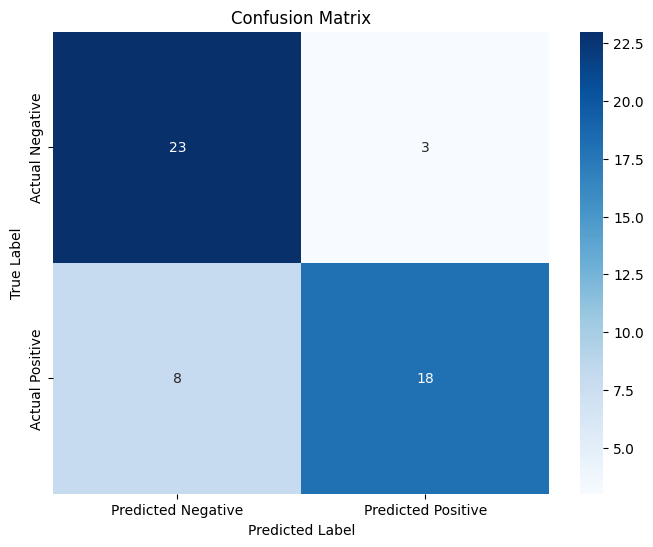

In [86]:
# Membuat visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()